<a href="https://colab.research.google.com/github/Diacod-I/BourneToKill/blob/main/BioInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monoamine Oxidase A

Monoamine Oxidase - A is an enzyme meant to break down neurotransmitters like serotonin, norepinephrine, epinephrine and dopamine. However, when the MAOA producing gene is mutated to a different variant (MAOA-L) due to a rare genetic condition called the ***Brunner's Syndrome***, it causes a deficiency in Monoamine Oxidase - A or creation of low-activity MAOA.<br><br>
The effects of this may include impulsive and aggressive behaviour, pyromania, hypersexuality etc. These traits are most commonly found in serial killers, and it is commonly termed as the **"Warrior"** gene.<br><br>
In the case of ***Bradley Waldroup***, who was [charged for aggravated kidnapping, voluntary manslaughter and attempted second-degree murder](https://casetext.com/case/state-v-waldroup-2) on the account of shooting his wife's friend 8 times and attacking his wife with a machete, he had the MAOA-L variant of the gene that added to his violent behaviour. Even though the final judgement of charges remained free of sway, this factor was well considered in his trial, leading to a slightly reduced sentence.<br><br>
The following notebook shows analysis of MAOA inhibition assay data. Inhibitors of MAOA (also known as MAOIs) is used to treat atypical depression, PTSD, OCD and mild anxiety disorder. This analysis will promote drug discovery with respect to the treatment of the above mentioned disorders through MAOA inhibition.

## Installation of packages

In [ ]:
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 9.5 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [ ]:
from chembl_webresource_client.new_client import new_client

In [ ]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 44.9 MB/s eta 0:00:00


## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import cv2
from google.colab.patches import cv2_imshow

## Searching for Target Protein MAO-A

In [ ]:
target = new_client.target
target_query = target.search('MAOA')
queries = pd.DataFrame.from_dict(target_query)
queries

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P21397', 'xref_name': None, 'xre...",Homo sapiens,Monoamine oxidase A,15.0,False,CHEMBL1951,"[{'accession': 'P21397', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P21398', 'xref_name': None, 'xre...",Bos taurus,Monoamine oxidase A,15.0,False,CHEMBL3254,"[{'accession': 'P21398', 'component_descriptio...",SINGLE PROTEIN,9913
2,"[{'xref_id': 'P21396', 'xref_name': None, 'xre...",Rattus norvegicus,Monoamine oxidase A,15.0,False,CHEMBL3358,"[{'accession': 'P21396', 'component_descriptio...",SINGLE PROTEIN,10116
3,"[{'xref_id': 'NBK23217', 'xref_name': 'Monoami...",Mus musculus,Monoamine oxidase A,15.0,False,CHEMBL3681,"[{'accession': 'Q64133', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Monoamine oxidase,13.0,False,CHEMBL2095196,"[{'accession': 'P19643', 'component_descriptio...",PROTEIN FAMILY,10116
5,[],Homo sapiens,Monoamine oxidase,13.0,False,CHEMBL2095205,"[{'accession': 'P21397', 'component_descriptio...",PROTEIN FAMILY,9606
6,[],Mus musculus,Monoamine oxidase,13.0,False,CHEMBL2111442,"[{'accession': 'Q8BW75', 'component_descriptio...",PROTEIN FAMILY,10090
7,[],Bos taurus,Monoamine oxidase,13.0,False,CHEMBL2111399,"[{'accession': 'P56560', 'component_descriptio...",PROTEIN FAMILY,9913


In [ ]:
xrefs = queries.target_components[0][0]['target_component_xrefs']
xrefs

[{'xref_id': 'MAOA', 'xref_name': 'Brunner syndrome', 'xref_src_db': 'CGD'},
 {'xref_id': 'P21397', 'xref_name': None, 'xref_src_db': 'ExpressionAtlas'},
 {'xref_id': 'GO:0005739',
  'xref_name': 'mitochondrion',
  'xref_src_db': 'GoComponent'},
 {'xref_id': 'GO:0005741',
  'xref_name': 'mitochondrial outer membrane',
  'xref_src_db': 'GoComponent'},
 {'xref_id': 'GO:0005829',
  'xref_name': 'cytosol',
  'xref_src_db': 'GoComponent'},
 {'xref_id': 'GO:0016020',
  'xref_name': 'membrane',
  'xref_src_db': 'GoComponent'},
 {'xref_id': 'GO:0005515',
  'xref_name': 'protein binding',
  'xref_src_db': 'GoFunction'},
 {'xref_id': 'GO:0008131',
  'xref_name': 'primary amine oxidase activity',
  'xref_src_db': 'GoFunction'},
 {'xref_id': 'GO:0016491',
  'xref_name': 'oxidoreductase activity',
  'xref_src_db': 'GoFunction'},
 {'xref_id': 'GO:0050660',
  'xref_name': 'flavin adenine dinucleotide binding',
  'xref_src_db': 'GoFunction'},
 {'xref_id': 'GO:0052595',
  'xref_name': 'aliphatic amine 

In [ ]:
MaOA = queries.target_chembl_id[0]
MaOA

'CHEMBL1951'

Now the following shows the retrieval of bioactivity data for Monoamine oxidase A from ChemBL

In [ ]:
activity = new_client.activity
bio = activity.filter(target_chembl_id=MaOA).filter(standard_type='IC50')

In [ ]:
biodf = pd.DataFrame.from_dict(bio)

In [ ]:
biodf.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,5.47
1,None,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,1.36
2,None,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,30.8
3,None,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,22.5
4,None,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Monoamine oxidase A,9606,None,None,IC50,uM,UO_0000065,None,0.18


In [ ]:
biodf.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
biodf.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [ ]:
biodf.to_csv('bioactivityMAO-A.csv',index=False)

In [ ]:
biodf[biodf['target_organism']=='Homo sapiens']['assay_description'].unique()

## Extraction and Wrangling of Data

In [ ]:
!head "/content/bioactivityMAO-A.csv"

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamine oxidase-A (MAO-A).,B,,,BAO_0000190,BAO_0000357,single protein format,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,,,CHEMBL1151505,Bioorg Med Chem Lett,1996.0,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', 'sei': '9.46'}",CHEMBL156630,,CHEMBL15663

In [ ]:
biocsv = pd.read_csv("/content/bioactivityMAO-A.csv")

In [ ]:
biocsv = biocsv[biocsv.standard_value.notna()].drop('activity_comment',axis=1)

In [ ]:
biocsv[biocsv.bao_label=='single protein format'].head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,5.47
1,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.36
2,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,30.80
3,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,22.50
4,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.18


In [ ]:
biocsv.columns

Index(['activity_id', 'activity_properties', 'assay_chembl_id',
       'assay_description', 'assay_type', 'assay_variant_accession',
       'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label',
       'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [ ]:
biocsv.molecule_pref_name.unique()

array([nan, 'BROFAROMINE', 'RASAGILINE', 'AZILECT', 'GEIPARVARIN',
       'XANTHONE', 'DEMETHYLBELLIDIFOLIN', 'BELLIDIFOLIN',
       'GENTIAKOCHIANIN', 'DECUSSATIN', 'TRANYLCYPROMINE HYDROCHLORIDE',
       'HYDRAZINECARBOXAMIDE', 'METHOXSALEN', 'LADOSTIGIL', 'SELEGILINE',
       'MOCLOBEMIDE', 'IPRONIAZID', 'CLORGILINE', 'LUTEOLIN', 'APIGENIN',
       'QUERCETIN', 'ISATIN', 'CIPARGAMIN', '(E)-6-STYRYLISATIN',
       '4-BENZYLOXYANILINE', '3-(BENZYLOXY)ANILINE',
       '4-PHENETHYLANILINE HYDROCHLORIDE', '4-PHENOXYANILINE',
       '(E)-4-STYRYLANILINE', 'GLITAZONE', 'PHTHALIMIDE',
       'N-PHENYLCINNAMAMIDE', 'N-M-TOLYLCINNAMAMIDE',
       'N-(3-CHLOROPHENYL)CINNAMAMIDE', 'BENZO[DEF]CHRYSENE',
       '1-NAPHTHYLISOTHIOCYANATE', 'AMILORIDE', '2-ACETYLAMINOFLUORENE',
       '2-HYDROXYPROPYL-BETA-CYCLODEXTRIN', 'GUANABENZ',
       'ETHYNODIOL DIACETATE', 'GENISTEIN', 'CIGLITAZONE', 'DISULFIRAM',
       'CHLOROXYLENOL', 'PHENELZINE', 'PENTAMIDINE', 'NOCODAZOLE',
       'PHENOTHIAZINE', 'PI

In [ ]:
biocsv.value

0         5.47
1         1.36
2        30.80
3        22.50
4         0.18
         ...  
4959     30.30
4960      4.54
4961      6.70
4962    161.40
4965     10.00
Name: value, Length: 3804, dtype: float64

The SMILES Notation represents molecule structural information.

In [ ]:
biocsv.canonical_smiles.head()

0    C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21
1            C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21
2                      CC(C)/N=C1/CCc2c1n(C)c1ccccc21
3            C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21
4                       COc1cc(Br)c2oc(C3CCNCC3)cc2c1
Name: canonical_smiles, dtype: object

In [ ]:
biocsv.standard_units.unique()

array(['nM', 'ug.mL-1', 'µM'], dtype=object)

In [ ]:
print("Total number of ChemBL molecule IDs:",biocsv.molecule_chembl_id.count())

Total number of ChemBL molecule IDs: 1244


In [ ]:
print("Unique number of ChemBL molecule IDs:",len(biocsv.molecule_chembl_id.unique()))

Unique number of ChemBL molecule IDs: 1052


Now time to categorize the molecules based on its standard value.<br> We have extracted data based on the IC<sub>50</sub> (half-maximal inhibitory concentration) type, which is a conventional measure used to check the inhibitory potency of a drug on a target.<br>On the basis of IC<sub>50</sub>, the inhibitory concentration will considered the classifying feature, and so we will consider drugs with 1000 nM and below to be ***'Active'*** drugs, drugs with 10,000 nM and above to be ***'Inactive'*** and the drugs that lies in between to be ***'Intermediate'***.

In [ ]:
nanoclassed = biocsv[biocsv.standard_units=='nM']
nanoclassed.head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,5.47
1,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1.36
2,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,30.80
3,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,22.50
4,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.18


In [ ]:
nanoclassed[nanoclassed.standard_value<1000].head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
4,191747,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.18
9,195163,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
12,204730,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.21
13,205972,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.65
14,208321,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,0.92


In [ ]:
nanoclassed[nanoclassed.standard_value>10000].head()

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
2,189322,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,30.8
3,190494,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,22.5
6,192853,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1000.0
7,192856,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1000.0
8,194036,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,113.0


In [ ]:
nanoclassed[nanoclassed.standard_value>1000][nanoclassed.standard_value<10000].head()

<ipython-input-14-42a5cef001de>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nanoclassed[nanoclassed.standard_value>1000][nanoclassed.standard_value<10000].head()


,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,184068,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,5.47
1,185442,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1.36
5,192851,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,2.12
10,198575,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,1.61
19,218928,[],CHEMBL715193,Compound was tested for inhibition of monoamin...,B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,...,Homo sapiens,Monoamine oxidase A,9606.0,NaN,NaN,IC50,uM,UO_0000065,NaN,3.74


In [ ]:
classlis = []
for _ in nanoclassed.standard_value:
  if float(_)<1000:
    classlis.append('Active')
  elif float(_)>1000 and float(_)<10000:
    classlis.append('Intermediate')
  else:
    classlis.append('Inactive')

In [ ]:
classlis[0:5]

['Intermediate', 'Intermediate', 'Inactive', 'Inactive', 'Active']

In [ ]:
smoldf = nanoclassed[['molecule_chembl_id','standard_value','canonical_smiles','ligand_efficiency']]

In [ ]:
smoldf.reset_index(drop=True,inplace=True)
smoldf

,molecule_chembl_id,standard_value,canonical_smiles,ligand_efficiency
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', ..."
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,"{'bei': '19.19', 'le': '0.38', 'lle': '2.95', ..."
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,"{'bei': '19.93', 'le': '0.36', 'lle': '1.19', ..."
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,"{'bei': '15.20', 'le': '0.30', 'lle': '1.73', ..."
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,"{'bei': '21.74', 'le': '0.51', 'lle': '3.07', ..."
...,...,...,...,...
1239,CHEMBL3134347,500000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1cccc(C(F)(F)...,NaN
1240,CHEMBL3134346,132000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1ccccc1C(F)(F)F,NaN
1241,CHEMBL3134345,273000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1ccc(Cl)cc1,NaN
1242,CHEMBL3134344,248000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1cccc(Cl)c1,NaN


In [ ]:
classlis = pd.DataFrame(classlis)
classlis.columns = ['Inhib_class']
classlis

,Inhib_class
0,Intermediate
1,Intermediate
2,Inactive
3,Inactive
4,Active
...,...
1239,Inactive
1240,Inactive
1241,Inactive
1242,Inactive


In [ ]:
smoldf = pd.concat([smoldf,classlis],axis=1)

In [ ]:
smoldf

,molecule_chembl_id,standard_value,canonical_smiles,ligand_efficiency,Inhib_class
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', ...",Intermediate
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,"{'bei': '19.19', 'le': '0.38', 'lle': '2.95', ...",Intermediate
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,"{'bei': '19.93', 'le': '0.36', 'lle': '1.19', ...",Inactive
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,"{'bei': '15.20', 'le': '0.30', 'lle': '1.73', ...",Inactive
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,"{'bei': '21.74', 'le': '0.51', 'lle': '3.07', ...",Active
...,...,...,...,...,...
1239,CHEMBL3134347,500000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1cccc(C(F)(F)...,NaN,Inactive
1240,CHEMBL3134346,132000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1ccccc1C(F)(F)F,NaN,Inactive
1241,CHEMBL3134345,273000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1ccc(Cl)cc1,NaN,Inactive
1242,CHEMBL3134344,248000.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1cccc(Cl)c1,NaN,Inactive


In [ ]:
smoldf.to_csv('neededdataMAO-A.csv',index=False)

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('neededdataMAO-A.csv')

In [ ]:
df.head()

,molecule_chembl_id,standard_value,canonical_smiles,ligand_efficiency,Inhib_class
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,"{'bei': '12.34', 'le': '0.27', 'lle': '0.67', ...",Intermediate
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,"{'bei': '19.19', 'le': '0.38', 'lle': '2.95', ...",Intermediate
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,"{'bei': '19.93', 'le': '0.36', 'lle': '1.19', ...",Inactive
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,"{'bei': '15.20', 'le': '0.30', 'lle': '1.73', ...",Inactive
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,"{'bei': '21.74', 'le': '0.51', 'lle': '3.07', ...",Active


In [ ]:
plt.style.use('dark_background')

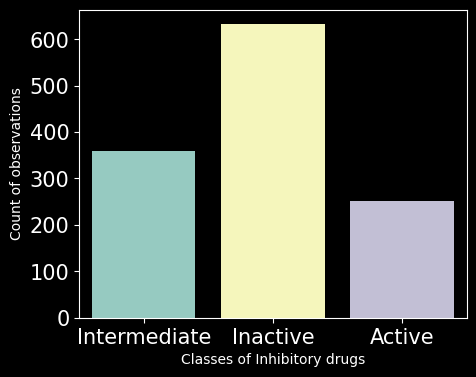

In [ ]:
fig,ax = plt.subplots(figsize=(5,4))
sns.countplot(x=df.Inhib_class)
ax.set_xlabel('Classes of Inhibitory drugs')
ax.set_ylabel('Count of observations')
plt.show()

As you can see, in the above graph, among the three classes of inhibitory drugs, majority of them are inactive against MAO-A.

In [ ]:
df.standard_value.max(),df.standard_value.min()

(1250000.0, 0.0049)

In [ ]:
df.ligand_efficiency.head()

0    {'bei': '12.34', 'le': '0.27', 'lle': '0.67', ...
1    {'bei': '19.19', 'le': '0.38', 'lle': '2.95', ...
2    {'bei': '19.93', 'le': '0.36', 'lle': '1.19', ...
3    {'bei': '15.20', 'le': '0.30', 'lle': '1.73', ...
4    {'bei': '21.74', 'le': '0.51', 'lle': '3.07', ...
Name: ligand_efficiency, dtype: object

In [ ]:
ligdf = df.dropna().copy()

In [ ]:
bler = ligdf.ligand_efficiency.apply(lambda x: ast.literal_eval(x))
bler = bler.apply(pd.Series)
bler

,bei,le,lle,sei
0,12.34,0.27,0.67,9.46
1,19.19,0.38,2.95,10.55
2,19.93,0.36,1.19,26.09
3,15.20,0.30,1.73,8.36
4,21.74,0.51,3.07,19.61
...,...,...,...,...
1231,9.63,0.20,-0.15,4.37
1232,11.63,0.24,0.96,5.59
1233,10.52,0.27,0.11,6.30
1237,10.23,0.22,-0.12,3.96


In [ ]:
ligdf = pd.concat([ligdf.drop('ligand_efficiency',axis=1),bler],axis=1)

In [ ]:
ligdf.head()

,molecule_chembl_id,standard_value,canonical_smiles,Inhib_class,bei,le,lle,sei
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,Intermediate,12.34,0.27,0.67,9.46
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,Intermediate,19.19,0.38,2.95,10.55
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,Inactive,19.93,0.36,1.19,26.09
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,Inactive,15.20,0.30,1.73,8.36
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,Active,21.74,0.51,3.07,19.61


In [ ]:
ligdf.dtypes

molecule_chembl_id     object
standard_value        float64
canonical_smiles       object
Inhib_class            object
bei                    object
le                     object
lle                    object
sei                    object
dtype: object

In [ ]:
ligdf.bei = ligdf.bei.astype(float)
ligdf['le'] = ligdf['le'].astype(float)
ligdf['lle'] = ligdf['lle'].astype(float)
ligdf['sei'] = ligdf['sei'].astype(float)

In [ ]:
ligdf.dtypes

molecule_chembl_id     object
standard_value        float64
canonical_smiles       object
Inhib_class            object
bei                   float64
le                    float64
lle                   float64
sei                   float64
dtype: object

In [ ]:
ligdf.dropna(inplace=True)

Number of values for Standard Value: 1031 



count      1031.000000
mean      17189.149216
std       21987.972271
min           0.100000
25%        1051.065000
50%        6560.000000
75%       25300.000000
max      100000.000000
Name: standard_value, dtype: float64

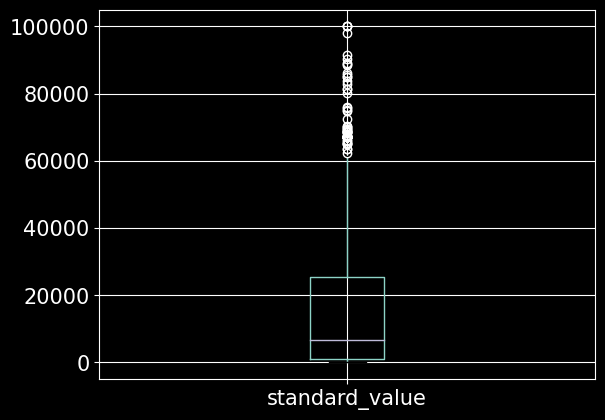

In [ ]:
print("Number of values for Standard Value:",ligdf.standard_value.count(),"\n")
standard_val = ligdf.boxplot(column=['standard_value'])
ligdf.standard_value.describe()

Standard value represents the concentration of inhibitory drugs needed for 50% inhibition of MAO-A. Therefore lower its value, higher the potency of the drug on MAO-A. Unit is nanomolar (nM). The above Box plot shows the distribution of data points in the dataset. Here for IC<sub>50</sub> value, majority, if not all, of the outliers lie above 60,000.

Number of values for Ligand Efficiency: 1031 

Number of values for Binding Efficiency Index: 1031 

Number of values for Lipophilic Ligand Efficiency: 1031 

Number of values for Surface Binding Efficiency Index: 1031 



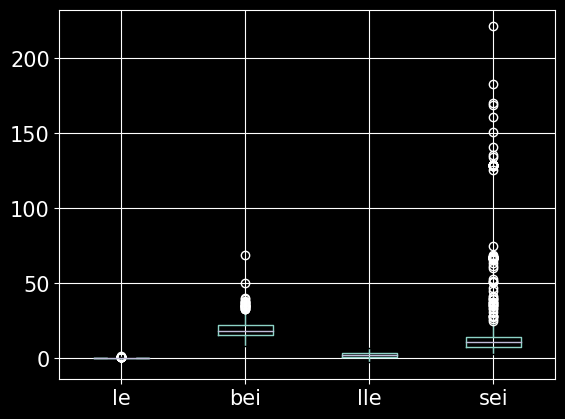

In [ ]:
print("Number of values for Ligand Efficiency:",ligdf['le'].count(),"\n")
print("Number of values for Binding Efficiency Index:",ligdf.bei.count(),"\n")
print("Number of values for Lipophilic Ligand Efficiency:",ligdf.lle.count(),"\n")
print("Number of values for Surface Binding Efficiency Index:",ligdf.sei.count(),"\n")
ligeff = ligdf.boxplot(column=['le','bei','lle','sei'])

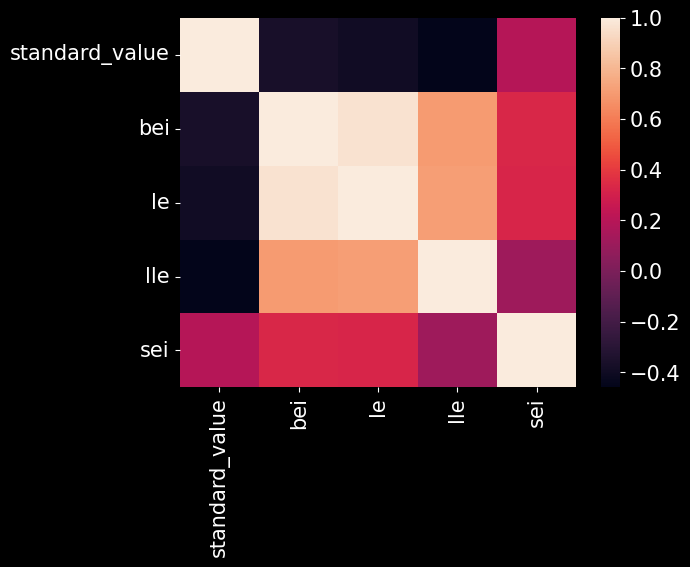

In [ ]:
sns.heatmap(ligdf.drop(['molecule_chembl_id','canonical_smiles','Inhib_class'],axis=1).corr())
plt.show()

From the heatmap above, we find that the IC<sub>50</sub> standard value of inhibition is negatively correlated with Ligand efficiency, Binding efficiency index and Lipophilic Ligand efficiency, and moderately correlated for Surface efficiency index.<br>
Ligand efficiency and Binding efficiency index are very well correlated to each other. The Scatter plot below shows this correlation.

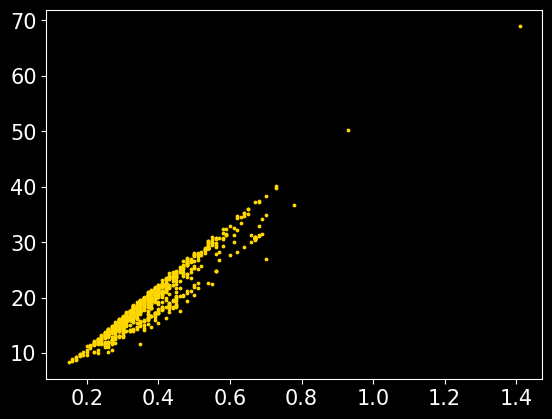

In [ ]:
plt.scatter(ligdf['le'],ligdf['bei'],s=3,c='gold')
plt.show()

In [ ]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

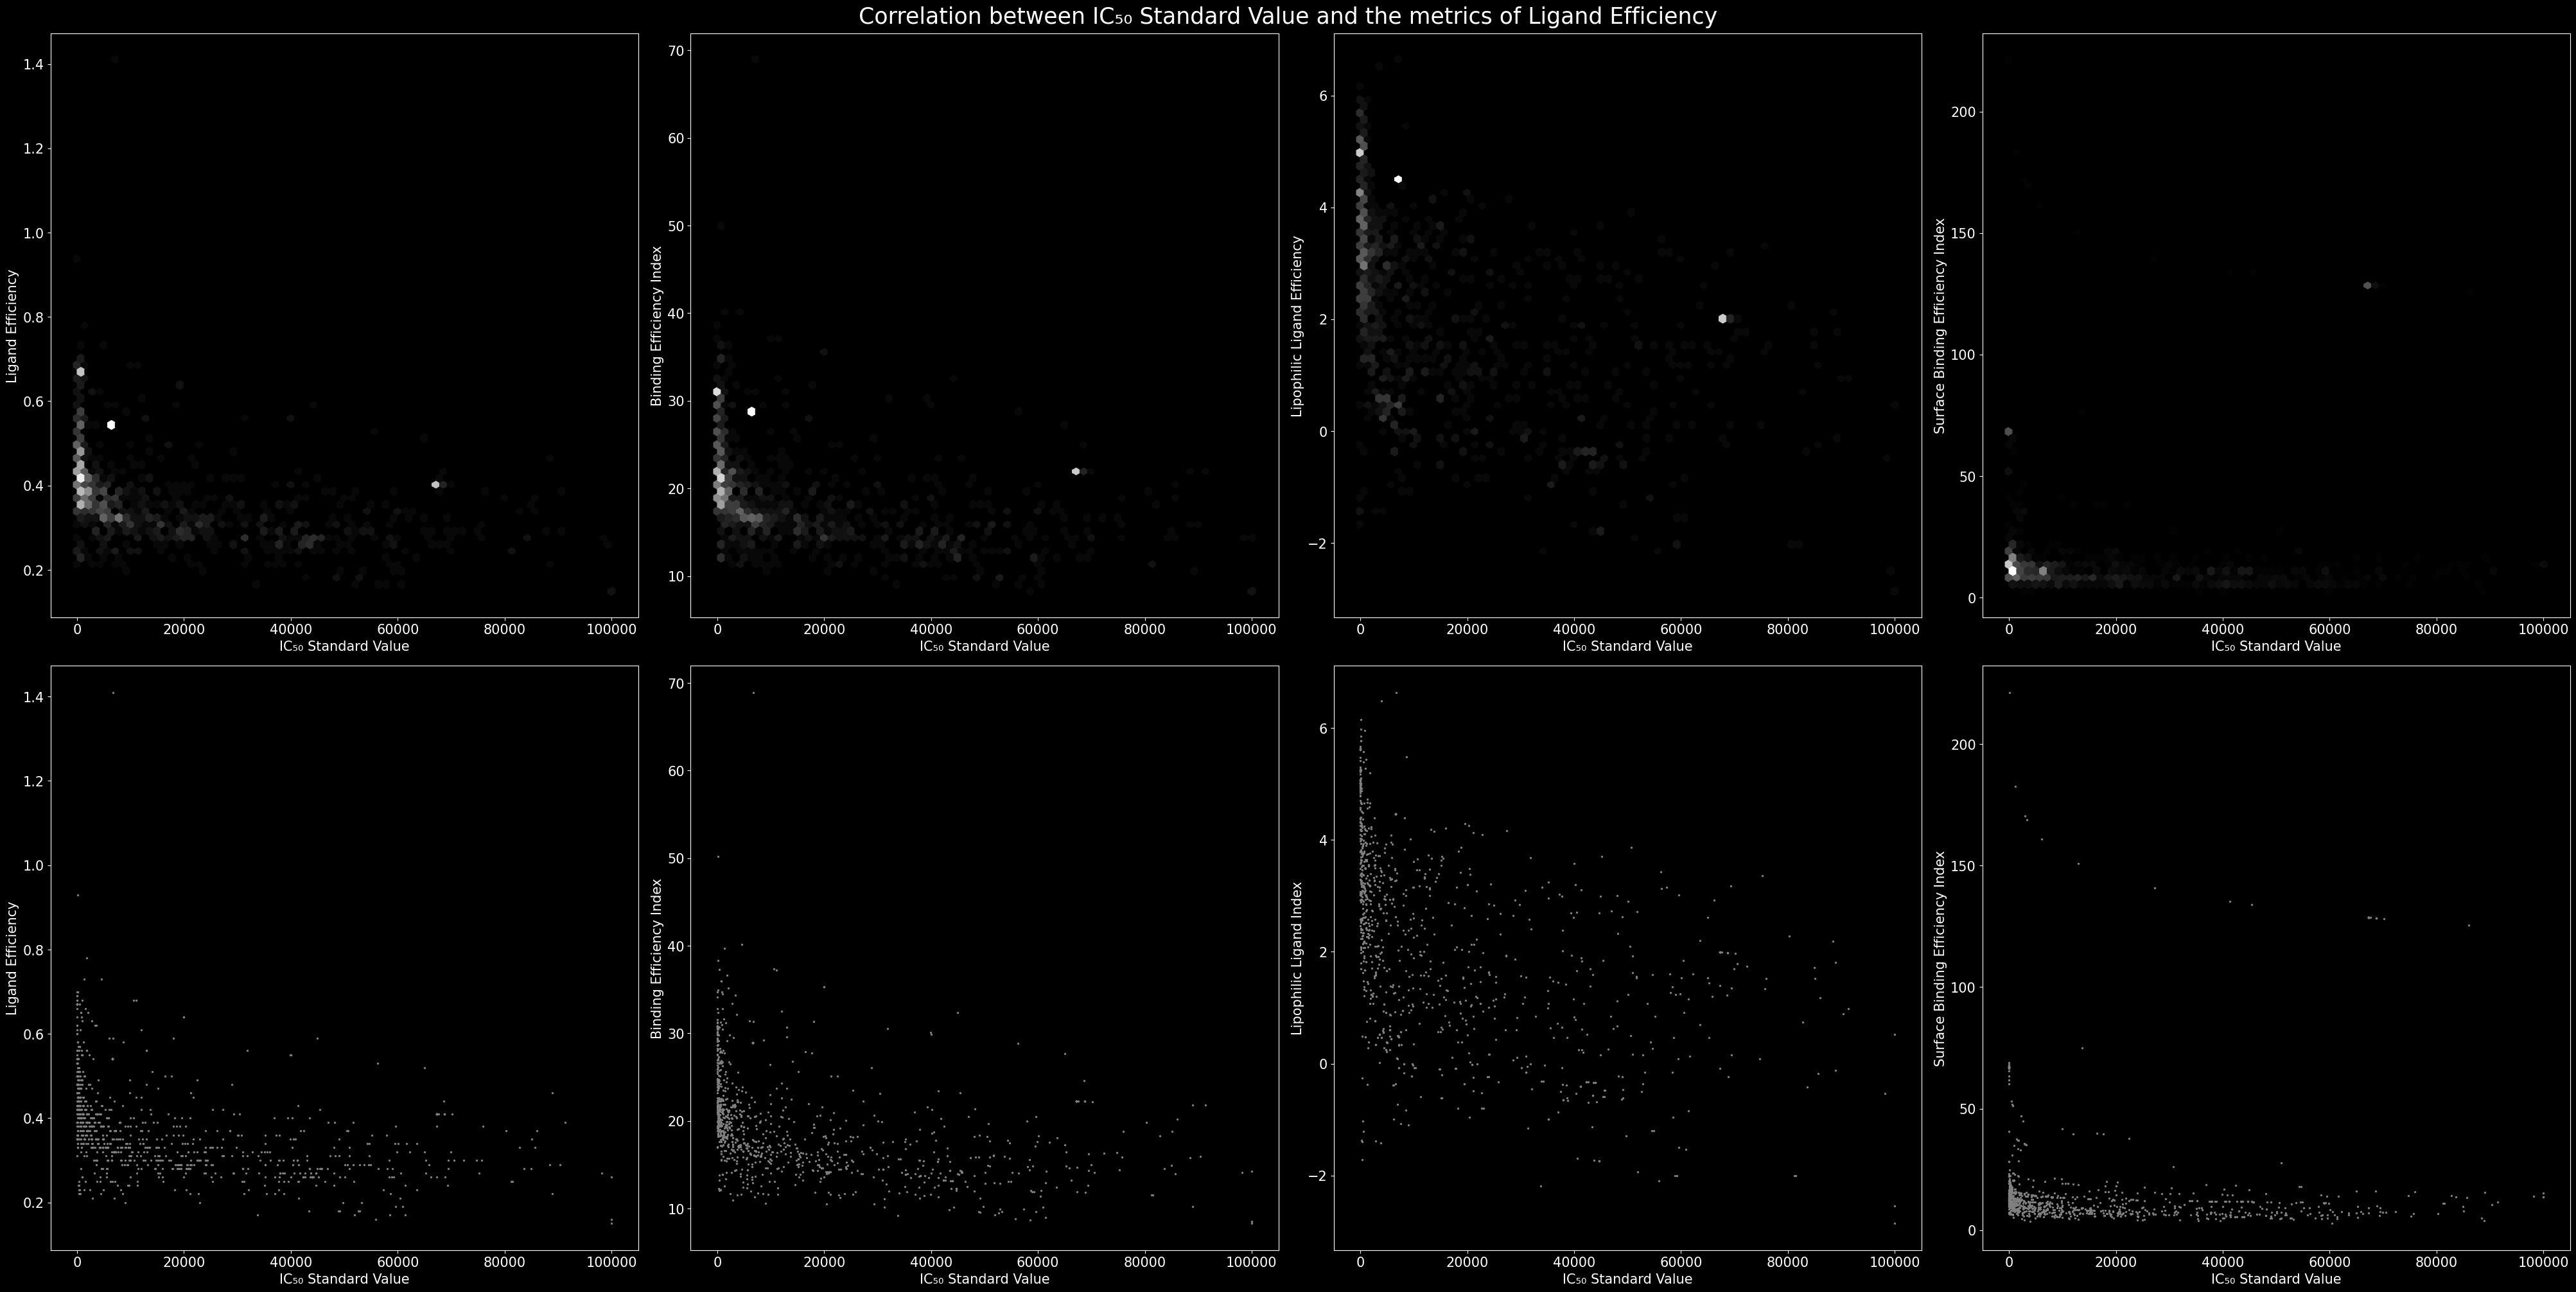

In [ ]:
figs,axs = plt.subplots(2,4,figsize=(40,20),layout='constrained')
axs[0][0].hexbin(ligdf['standard_value'],ligdf['le'],cmap='gray',gridsize=70)
axs[0][0].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[0][0].set_ylabel('Ligand Efficiency',fontsize=15)

axs[0][1].hexbin(ligdf['standard_value'],ligdf['bei'],cmap='gray',gridsize=70)
axs[0][1].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[0][1].set_ylabel('Binding Efficiency Index',fontsize=15)

axs[0][2].hexbin(ligdf['standard_value'],ligdf['lle'],cmap='gray',gridsize=70)
axs[0][2].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[0][2].set_ylabel('Lipophilic Ligand Efficiency',fontsize=15)

axs[0][3].hexbin(ligdf['standard_value'],ligdf['sei'],cmap='gray',gridsize=70)
axs[0][3].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[0][3].set_ylabel('Surface Binding Efficiency Index',fontsize=15)

axs[1][0].scatter(ligdf['standard_value'],ligdf['le'],s=2,c='grey')
axs[1][0].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[1][0].set_ylabel('Ligand Efficiency',fontsize=15)

axs[1][1].scatter(ligdf['standard_value'],ligdf['bei'],s=2,c='grey')
axs[1][1].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[1][1].set_ylabel('Binding Efficiency Index',fontsize=15)

axs[1][2].scatter(ligdf['standard_value'],ligdf['lle'],s=2,c='grey')
axs[1][2].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[1][2].set_ylabel('Lipophilic Ligand Index',fontsize=15)

axs[1][3].scatter(ligdf['standard_value'],ligdf['sei'],s=2,c='grey')
axs[1][3].set_xlabel('IC\u2085\u2080 Standard Value',fontsize=15)
axs[1][3].set_ylabel('Surface Binding Efficiency Index',fontsize=15)

figs.suptitle('Correlation between IC\u2085\u2080 Standard Value and the metrics of Ligand Efficiency',fontsize=25)
plt.show()

The above group of plots show the Hexbin (top) and Scatter (bottom) plots, that show the concentration of data and spread of data points respectively.

Enter index of SMILES notation to view: 30

Canonical smiles of index 30: COc1ccccc1C1CC(c2ccc(O)cc2O)=NN1C(C)=O

Shape of image: (300, 300, 3)



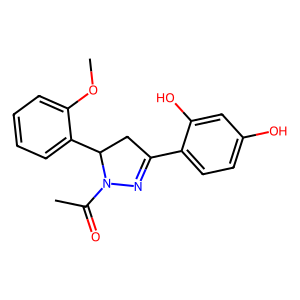

In [ ]:
i = int(input("Enter index of SMILES notation to view: "))
my_mol=Chem.MolFromSmiles(ligdf.canonical_smiles[i])
my_mol_with_H=Chem.AddHs(my_mol)
AllChem.EmbedMolecule(my_mol_with_H)
AllChem.MMFFOptimizeMolecule(my_mol_with_H)
my_embedded_mol = Chem.RemoveHs(my_mol_with_H)
#Save the molecule into an image
Draw.MolToFile(my_mol,'molecule.png')
#Save molecular rapresentation in mol files
fout = Chem.SDWriter('./charged_test.mol')
fout.write(my_embedded_mol)
fout.close()
print(f"\nCanonical smiles of index {i}: {ligdf['canonical_smiles'][i]}\n")
img = cv2.imread('molecule.png')
print(f"Shape of image: {img.shape}\n")
cv2_imshow(img)

## Calculation of Lipinski Descriptors

Lipinski Descriptors are physiochemical parameters set by Christopher A. Lipinski based on the Lipinski Rule of Five.It is used to evaluate the druglikeness of a substance. The rule is essential for describing the pharmacokinetic properties of a drug in the human body, like Absorption, Distribution, Metabolism and Excretion (ADME).<br>
The criteria of Lipinski's Rule of Five are the Lipinski Descriptors which are as follows:
* No more than 5 hydrogen donors (number of nitrogen-hydrogen and oxygen-hydrogen bonds)
* Molecular mass less than 500 Daltons
* No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
* Octanol-water partition coefficient (log P) should not exceed 5.

In [ ]:
def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol) 
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

In [ ]:
lipinsk = lipinski(ligdf.canonical_smiles).reset_index()
lipinsk

,index,MW,LogP,NumHDonors,NumHAcceptors
0,0,426.314,4.59450,1.0,4.0
1,1,305.765,2.91500,1.0,4.0
2,2,226.323,3.32200,0.0,2.0
3,3,305.765,2.91500,1.0,4.0
4,4,310.191,3.67090,1.0,3.0
...,...,...,...,...,...
1026,1026,443.941,4.42472,1.0,7.0
1027,1027,431.930,4.05980,1.0,7.0
1028,1028,430.736,4.42180,1.0,5.0
1029,1029,395.849,4.17250,1.0,6.0


In [ ]:
ligdf.reset_index()

,index,molecule_chembl_id,standard_value,canonical_smiles,Inhib_class,bei,le,lle,sei
0,0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,Intermediate,12.34,0.27,0.67,9.46
1,1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,Intermediate,19.19,0.38,2.95,10.55
2,2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,Inactive,19.93,0.36,1.19,26.09
3,3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,Inactive,15.20,0.30,1.73,8.36
4,4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,Active,21.74,0.51,3.07,19.61
...,...,...,...,...,...,...,...,...,...
1026,1231,CHEMBL3134355,53200.0,Cc1nccc(-c2cncc(S(=O)(=O)Nc3nc(-c4ccc(Cl)cc4)c...,Inactive,9.63,0.20,-0.15,4.37
1027,1232,CHEMBL3134354,9500.0,Cn1nccc1-c1cncc(S(=O)(=O)Nc2nc(-c3ccc(Cl)cc3)c...,Intermediate,11.63,0.24,0.96,5.59
1028,1233,CHEMBL3134353,29300.0,O=S(=O)(Nc1nc(-c2ccc(Cl)cc2)cs1)c1cncc(Br)c1,Inactive,10.52,0.27,0.11,6.30
1029,1237,CHEMBL3134349,88900.0,O=[N+]([O-])c1ccccc1S(=O)(=O)Nc1nc(-c2ccc(Cl)c...,Inactive,10.23,0.22,-0.12,3.96


In [ ]:
ligdf = pd.concat([ligdf.reset_index(),lipinsk],axis=1)

In [ ]:
ligdf = pd.concat([ligdf.drop('Inhib_class',axis=1),ligdf.Inhib_class],axis=1)

In [ ]:
ligdf = ligdf.drop('index',axis=1)

In [ ]:
ligdf.head()

,molecule_chembl_id,standard_value,canonical_smiles,bei,le,lle,sei,MW,LogP,NumHDonors,NumHAcceptors,Inhib_class
0,CHEMBL156630,5470.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,12.34,0.27,0.67,9.46,426.314,4.5945,1.0,4.0,Intermediate
1,CHEMBL155754,1360.0,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,19.19,0.38,2.95,10.55,305.765,2.9150,1.0,4.0,Intermediate
2,CHEMBL348083,30800.0,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,19.93,0.36,1.19,26.09,226.323,3.3220,0.0,2.0,Inactive
3,CHEMBL157182,22500.0,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,15.20,0.30,1.73,8.36,305.765,2.9150,1.0,4.0,Inactive
4,CHEMBL160347,180.0,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,21.74,0.51,3.07,19.61,310.191,3.6709,1.0,3.0,Active
